In [69]:
import numpy as np 
import pandas as pd
import snapml

In [70]:
#getting data from kaggle
titanic_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [71]:
#checking the correlation
titanic_data.corr()

C:\Users\eren\AppData\Local\Temp\ipykernel_18412\1312813952.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [72]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
#checking data desciption
titanic_data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [74]:
titanic_data.shape

(891, 12)

In [75]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Handling missing values

In [76]:
titanic_data.isnull().sum().to_frame()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Getting features from cabin data instead of dropping it 

In [77]:

# cabin_data = titanic_data[['Cabin']].copy()
# cabin_data["Deck"] = cabin_data["Cabin"].str.slice(0,1)
# cabin_data['Deck'] = cabin_data['Deck'].apply(lambda x : x if x in ['A','B','C','D','E','F','G'] else 'NoCabin')

# cabin_data.drop(['Cabin'],axis=1,inplace=True)

# cabin_data.head(10)

# a = pd.get_dummies(cabin_data[['Deck']])
# a.head(10)

In [78]:
#we can't use cabin data because it is majority in the data set so i will use other attributes
#i want to change null age to mean age values

mean = titanic_data['Age'].mean()
titanic_data['Age'].replace(np.nan,mean,inplace=True)

#dropping the cabin column beacuse it affects aour data set without values
titanic_data.drop(['Cabin'], axis=1, inplace=True)

titanic_data.isnull().sum().to_frame()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [79]:
titanic_data.fillna({'Embarked':'S'},inplace=True)
titanic_data['Embarked'].isnull().value_counts()

False    891
Name: Embarked, dtype: int64

## Adding title to feature set
**We can get passangers' Title from name column**

In [80]:
titanic_data['Title'] = titanic_data['Name'].apply(lambda x : x.split(' ')[1].strip('123,./!?'))
titanic_data.drop('Name', axis = 1 , inplace = True)
titanic_data['Title'] = titanic_data['Title'].apply(lambda x : x if x in ['Mr','Miss','Mrs','Master'] else 'NoTitle')
titanic_data['Title'].value_counts()

Mr         502
Miss       179
Mrs        121
NoTitle     49
Master      40
Name: Title, dtype: int64

In [81]:

#creating feature set
features = ['Age','Fare','Parch','SibSp','Survived']

#differing categorical variables into diffrent columns to calculate better
X = pd.get_dummies(titanic_data[['Embarked','Sex','Pclass','Title']])
X = pd.concat([X,titanic_data[features]], axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         891 non-null    int64  
 1   Embarked_C     891 non-null    uint8  
 2   Embarked_Q     891 non-null    uint8  
 3   Embarked_S     891 non-null    uint8  
 4   Sex_female     891 non-null    uint8  
 5   Sex_male       891 non-null    uint8  
 6   Title_Master   891 non-null    uint8  
 7   Title_Miss     891 non-null    uint8  
 8   Title_Mr       891 non-null    uint8  
 9   Title_Mrs      891 non-null    uint8  
 10  Title_NoTitle  891 non-null    uint8  
 11  Age            891 non-null    float64
 12  Fare           891 non-null    float64
 13  Parch          891 non-null    int64  
 14  SibSp          891 non-null    int64  
 15  Survived       891 non-null    int64  
dtypes: float64(2), int64(4), uint8(10)
memory usage: 50.6 KB


In [82]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(contamination = 0.02)

outliers = clf.fit_predict(X)

train_data_cleaned = X[np.where(outliers == 1, True, False)]
train_data_cleaned.shape

(876, 16)

In [83]:
y = train_data_cleaned.Survived

X = train_data_cleaned.drop('Survived', axis = 1)

print(y.shape)
print(X.shape)

(876,)
(876, 15)


##SAMPLİNG DATA TO Distribute weights

0    538
1    338
Name: Survived, dtype: int64
0    538
1    538
Name: Survived, dtype: int64


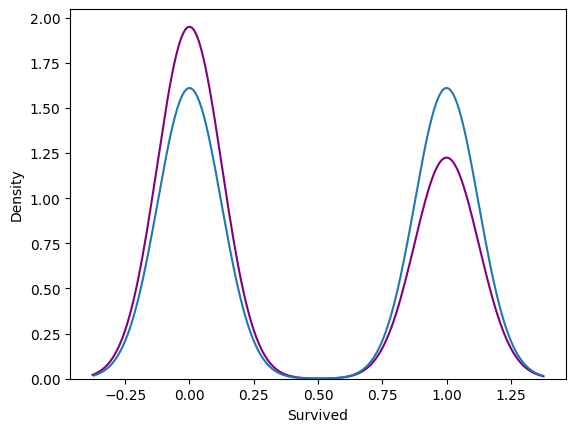

In [84]:
from imblearn.over_sampling import SMOTE
import seaborn as sns
smote = SMOTE( random_state=42)

print(y.value_counts())
X_resampled, y_resampled = smote.fit_resample(X,y)
print(y_resampled.value_counts())

sns.kdeplot(y, label = "Original" , color = 'purple')
sns.kdeplot(y_resampled, label = "Modified")
X = X_resampled
y = y_resampled

In [85]:
#to standartilise our data
from sklearn import preprocessing
#importing test split
from sklearn.model_selection import train_test_split

#standarting our data 
transform = preprocessing.StandardScaler()

X = transform.fit_transform(X)

#splitting the data
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state=1)

## Trying models

In [86]:
#trying support vector machine
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score

clf = svm.SVC(kernel='rbf')
clf.fit(train_x, train_y)
predictions = clf.predict(test_x)

print('f1 score:',f1_score(test_y, predictions, average='weighted')) 
print('accuracy score: ',accuracy_score(test_y,predictions))

f1 score: 0.8668041356099669
accuracy score:  0.8668730650154799


In [87]:
#trying diffrent k nearest neighbors:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score

KNN = KNeighborsClassifier(n_neighbors=3).fit(train_x,train_y)
predictions = KNN.predict(test_x)

KNN_Accuracy_Score = accuracy_score(predictions,test_y)
KNN_JaccardIndex = jaccard_score(predictions,test_y)
KNN_F1_Score = f1_score(predictions,test_y)

print('ACCURACY SCORE OF THE MODEL IS : ',KNN_Accuracy_Score)
print('JACCARD INDEX FOR MODEL IS: ', KNN_JaccardIndex)
print('F1 VALUE FOR MODEL IS : ', KNN_F1_Score)

ACCURACY SCORE OF THE MODEL IS :  0.8513931888544891
JACCARD INDEX FOR MODEL IS:  0.7433155080213903
F1 VALUE FOR MODEL IS :  0.852760736196319


### trying IBM's snapml library for faster results

In [88]:
import snapml.SupportVectorMachine
from sklearn.model_selection import GridSearchCV
#i am tuning this model using sklearn's gridsearchcv
model = snapml.SupportVectorMachine()

parameters = {'kernel':['linear', 'rbf'],'gamma':np.logspace(-2,2,10),'loss':['hinge','squared_hinge'],'class_weight':['balanced',None],
              'n_components':[100,150,200,300],
                                                                       }

model_cv = GridSearchCV(model,parameters,refit=True,n_jobs=10,cv=20)
model_cv.fit(train_x,train_y)

GridSearchCV(cv=20, estimator=SupportVectorMachine(), n_jobs=10,
             param_grid={'class_weight': ['balanced', None],
                         'gamma': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'kernel': ['linear', 'rbf'],
                         'loss': ['hinge', 'squared_hinge'],
                         'n_components': [100, 150, 200, 300]})

In [89]:
model_cv.best_score_

0.8525604551920342

In [90]:
from sklearn.ensemble import RandomForestClassifier
#use “balanced_subsample”
rand_f = RandomForestClassifier(class_weight='balanced_subsample')
rand_f.fit(train_x,train_y)
predictions = rand_f.predict(test_x)
rf_Accuracy_Score = accuracy_score(predictions,test_y)
rf_JaccardIndex = jaccard_score(predictions,test_y)
rf_F1_Score = f1_score(predictions,test_y,average='weighted')

print('ACCURACY SCORE OF THE MODEL IS : ',rf_Accuracy_Score)
print('JACCARD INDEX FOR MODEL IS: ', rf_JaccardIndex)
print('F1 VALUE FOR MODEL IS : ', rf_F1_Score)

ACCURACY SCORE OF THE MODEL IS :  0.8637770897832817
JACCARD INDEX FOR MODEL IS:  0.7608695652173914
F1 VALUE FOR MODEL IS :  0.8637744783479965


In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import GradientBoostingClassifier


In [92]:
from sklearn.pipeline import Pipeline

pipeline_dt=Pipeline([('GaussianNB',GaussianNB())])
pipeline_knn=Pipeline([('KNeighborsClassifier',KNeighborsClassifier())])
pipeline_rf=Pipeline([ ('RandomForestClassifier',RandomForestClassifier())])
pipeline_dt=Pipeline([ ('DecisionTreeClassifier',DecisionTreeClassifier())])
pipeline_xgb=Pipeline([ ('XGBClassifier',XGBClassifier())])
pipeline_lgr=Pipeline([ ('LogisticRegression',LogisticRegression(solver='lbfgs', max_iter=3000))])
#pipeline_adaB=Pipeline([ ('AdaBoostClassifier',AdaBoostClassifier())])
pipeline_adaB=Pipeline([ ('AdaBoostClassifier',GradientBoostingClassifier())])

pipelines = [pipeline_dt, pipeline_knn, pipeline_rf,pipeline_dt,pipeline_xgb , pipeline_lgr  , pipeline_adaB]
pipe_dict = {0: 'GaussianNB', 1: 'KNeighborsClassifier', 2: 'RandomForestClassifier',
             3: 'DecisionTreeClassifier',4: 'XGBClassifier' , 5 : 'LogisticRegression' ,
             6 : 'AdaBoostClassifier'}

In [93]:
from sklearn.metrics import accuracy_score
original_results = dict()
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X, y, cv=10 ,scoring='accuracy').mean()
    #print(model.get_params())
    original_results[pipe_dict[i]] = cv_score

In [94]:
for key , value in sorted(original_results.items(),key=lambda item : item[1]):
    print(key , value) 

GaussianNB 0.8097352024922119
DecisionTreeClassifier 0.8162339910003462
KNeighborsClassifier 0.8450069228106611
LogisticRegression 0.8469193492557979
RandomForestClassifier 0.8478625822083765
XGBClassifier 0.8496798200069229
AdaBoostClassifier 0.8672637590861889


In [95]:
#Cat Boost Classifier
cat = GradientBoostingClassifier()
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
#USING GRID SEARCH
parameters = {'learning_rate': sp_randFloat(),
                  'subsample'    : sp_randFloat(),
                  'n_estimators' : sp_randInt(100, 1000),
                  'max_depth'    : sp_randInt(4, 10)
                 }
grid_search_cat = RandomizedSearchCV(estimator=cat, param_distributions = parameters,verbose=1,scoring='accuracy',
                               cv = 10, n_iter = 100, n_jobs=-1).fit(X, y)
cat_best = grid_search_cat.best_estimator_
print('CatBoost Best Score',grid_search_cat.best_score_)
print('CatBoost Best Parmas',grid_search_cat.best_params_)
print('CatBoost Accuracy',cross_val_score(cat_best,X, y, cv=5).mean())

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
CatBoost Best Score 0.8700848044305989
CatBoost Best Parmas {'learning_rate': 0.021591212544107896, 'max_depth': 5, 'n_estimators': 361, 'subsample': 0.3056042759928471}
CatBoost Accuracy 0.8643669250645996


In [111]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
folds = 5
param_comb = 100
xgb=XGBClassifier()
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(X,y), verbose=3, random_state=1001 )

# Here we go
random_search.fit(X, y)
xgb_best = random_search.best_estimator_
print('XGB Best Score',random_search.best_score_)
print('XGB Best Parmas',random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
XGB Best Score 0.9253749855774778
XGB Best Parmas {'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 1.5, 'colsample_bytree': 1.0}


## Preparing the test data

In [96]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [97]:
#preparing test data
test_data['Title'] = test_data['Name'].apply(lambda x : x.split(' ')[1].strip('123,./!?'))
test_data.drop('Name', axis = 1 , inplace = True)
test_data['Title'] = test_data['Title'].apply(lambda x : x if x in ['Mr','Miss','Mrs','Master'] else 'NoTitle')



final_test_x = pd.get_dummies(test_data[['Embarked','Sex','Pclass','Title']])
final_test_x = pd.concat([final_test_x,test_data[['Age','Fare','Parch','SibSp']]], axis=1)
#standarding our test data

mean = final_test_x['Age'].mean()
final_test_x['Age'].replace(np.nan,mean,inplace=True)
mean = final_test_x['Fare'].mean()
final_test_x['Fare'].replace(np.nan,mean,inplace=True)

#getting cabin dATA
# cabin_data = test_data[['Cabin']].copy()
# cabin_data["Deck"] = cabin_data["Cabin"].str.slice(0,1)
# cabin_data['Deck'] = cabin_data['Deck'].apply(lambda x : x if x in ['A','B','C','D','E','F','G'] else 'NoCabin')

# cabin_data.drop(['Cabin'],axis=1,inplace=True)
# a = pd.get_dummies(cabin_data[['Deck']])

# final_test_x = pd.concat([final_test_x,a],axis=1)
final_test_x.info()

transform = preprocessing.StandardScaler()

final_test_x = transform.fit_transform(final_test_x)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Embarked_C     418 non-null    uint8  
 2   Embarked_Q     418 non-null    uint8  
 3   Embarked_S     418 non-null    uint8  
 4   Sex_female     418 non-null    uint8  
 5   Sex_male       418 non-null    uint8  
 6   Title_Master   418 non-null    uint8  
 7   Title_Miss     418 non-null    uint8  
 8   Title_Mr       418 non-null    uint8  
 9   Title_Mrs      418 non-null    uint8  
 10  Title_NoTitle  418 non-null    uint8  
 11  Age            418 non-null    float64
 12  Fare           418 non-null    float64
 13  Parch          418 non-null    int64  
 14  SibSp          418 non-null    int64  
dtypes: float64(2), int64(3), uint8(10)
memory usage: 20.5 KB


In [112]:

#making predictions
y_predictions = xgb_best.predict(final_test_x)

In [113]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': y_predictions})
output.to_csv('submission.csv', index=False)

In [114]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
